<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/categorical_cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 122.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
from scikeras.wrappers import KerasClassifier

In [7]:
from sklearn.model_selection import KFold, cross_val_score

In [8]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
!ls /content/drive/MyDrive/datasets/ECG/

mitbih_test.csv  mitbih_train.csv


In [11]:
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH,header=None)
test  = pd.read_csv(TEST_PATH,header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


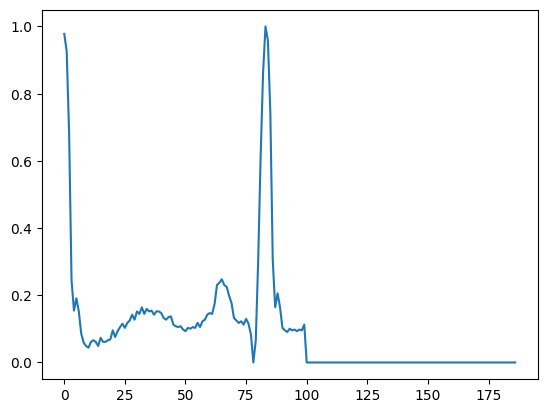

In [15]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [16]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


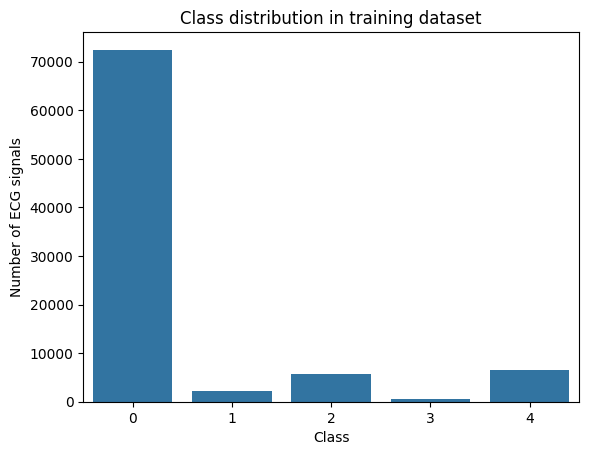

In [17]:
# Visualize the number of subjects in each class in the train dataset:
counts = train.iloc[:, -1].value_counts().sort_index()
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=counts.values)
plt.xlabel("Class")
plt.ylabel("Number of ECG signals")
plt.title("Class distribution in training dataset")
plt.show()

In [18]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# checking missing values:
train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [20]:
test.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [21]:
X = train.iloc[:, :-1]   # 0–186
y = train.iloc[:, -1]    # class labels (0–4)


In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [25]:
from keras.utils import to_categorical
y_res_cat = to_categorical(y_res, num_classes=5)


In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [27]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

y_test_cat = to_categorical(y_test, num_classes=5)


In [28]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',   # 🔴 CHANGED HERE
        metrics=['accuracy']
    )
    return model


In [29]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8199 - loss: 0.4984 - val_accuracy: 0.9297 - val_loss: 0.1987
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9350 - loss: 0.1838 - val_accuracy: 0.9552 - val_loss: 0.1385
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9537 - loss: 0.1352 - val_accuracy: 0.9603 - val_loss: 0.1161
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9630 - loss: 0.1090 - val_accuracy: 0.9633 - val_loss: 0.1040
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9686 - loss: 0.0945 - val_accuracy: 0.9704 - val_loss: 0.0885
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9727 - loss: 0.0826 - val_accuracy: 0.9713 - val_loss: 0.0862
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9755 - loss: 0.0757 - val_accuracy: 0.9727 - val_loss: 0.0834
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9782 - loss: 0

In [30]:
from sklearn.metrics import matthews_corrcoef

y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Validation MCC: 0.9765775317221579


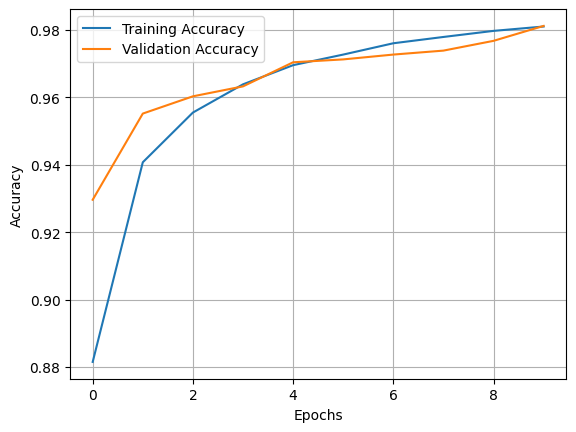

In [31]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


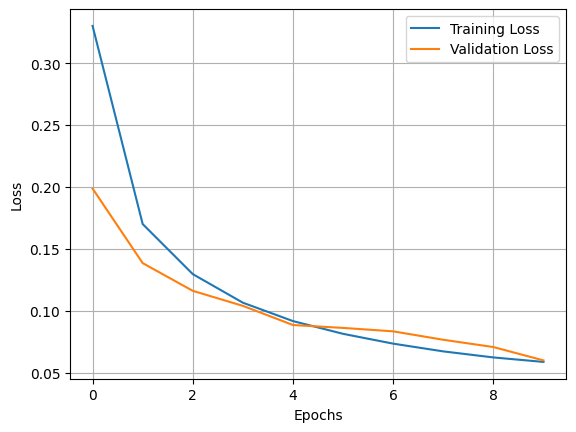

In [32]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9465 - loss: 0.1596
Test Accuracy: 0.9429014921188354
Test Loss: 0.19841738045215607


In [34]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_test_pred))


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     18118
         1.0       0.44      0.80      0.57       556
         2.0       0.79      0.94      0.86      1448
         3.0       0.50      0.85      0.63       162
         4.0       0.98      0.96      0.97      1608

    accuracy                           0.94     21892
   macro avg       0.74      0.90      0.80     21892
weighted avg       0.96      0.94      0.95     21892



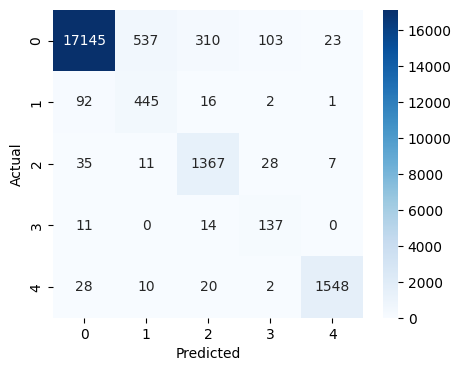

In [35]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_res,
    y_res_cat,
    cv=kfold,
    scoring='accuracy'
)

print("CV scores:", results)
print("Mean CV accuracy:", results.mean())


CV scores: [0.97961121 0.97696188 0.97877226 0.9733298 ]
Mean CV accuracy: 0.9771687879593572
